## Implementation of model "An analytical model for simulating steady state flows of downburst"

In [62]:
import numpy as np
import math
from scipy.integrate import solve_ivp
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

#### Numerical Integrator

Let's create the simulation part of the vector field and ODE solver to solve a simple problem first, say no wind.

In [75]:
class numericalIntegrator:
    
    def __init__(self, dt, t_max):
        self.dt = dt
        self.t_max = t_max
        self.t_eval = np.arange(0, t_max, dt)
        print('Initialized Integrator!')
    
    def init_ode(self, f_update, v_update):
        self.f_update = f_update
        self.v_update = v_update
    
                
    def up_bcs(self, x0, y0, z0):
        self.init_state = [x0, y0, z0]
        print('Updated Boundary Conditions')
    
        
    def solve_ivp(self):
        solution = solve_ivp(self.ode, [0, self.t_max], self.init_state)
        self.solution = solution
        print('Solved!')
        
        
    def show_x(self):
        
        plt.plot(self.solution.t, self.solution.y[0])
        
    def show_y(self):
        
        plt.plot(self.solution.t, self.solution.y[1])    
        
    def show_z(self):
        
        plt.plot(self.solution.t, self.solution.y[2])
        
        
    def show_trajectory(self):
        
        # Extract trajectory
        x_traj, y_traj, z_traj = solver.solution.y[:3]

        # Plot the trajectory
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection="3d")
        ax.plot(x_traj, y_traj, z_traj, label="Drifter Trajectory", color="blue")
        ax.scatter([x_traj[0]], [y_traj[0]], [z_traj[0]], color="green", label="Start")
        ax.scatter([x_traj[-1]], [y_traj[-1]], [z_traj[-1]], color="red", label="End")

        # Labels and legend
        ax.set_title("3D Trajectory of a Lagrangian Drifter in Downburst Flow")
        ax.set_xlabel("X (m)")
        ax.set_ylabel("Y (m)")
        ax.set_zlabel("Z (m)")
        ax.legend()
        plt.show()
        
    def xy_field(self, z = 1, scale = 5):
        
        def velocity_field_2d(x, y, z=z):
            r_m = 1.1 * 1000  # m
            z_m = 0.02 * 1000  # m
            R_c = 200  # m
            b = 0.1287
            c_1 = -0.133
            c_2 = 1.1534
            lambda_factor = 10  # Adjust this if needed

            u, v = radial_velocity(x, y, z, r_m, R_c, b, z_m, c_1, c_2)
            return u, v
        
        grid_size = np.linspace(-5, 5, 10)
        X, Y = np.meshgrid(grid_size, grid_size)

        U, V, _ = velocity_field_2d(X, Y)

        U = U*100*scale
        V = V*100*scale
        
        print(X)
        fig = ff.create_quiver(X, Y, U, V,
                               scale=.25,
                               arrow_scale=.4,
                               name='quiver',
                               line_width=1)

        fig.update_layout(title_text='2D Vector Field Representation', title_x=0.5)
        fig.update_layout(yaxis=dict(title_text="y"), xaxis=dict(title_text="X"))

        fig.show()
      

In [76]:
def radial_velocity(x, y, z, r_m, R_c, b, z_m, c_1, c_2):
    """
    computes the u, v vectors for x, y, z
    x, y, z: coordinates
    r_m: radius of maximum horizontal wind speed.
    R_c: characteristic length scale.
    b: parameter for the radial profile.
    z_m: height of maximum horizontal wind speed.
    c_1, c_2: parameters for the vertical profile.
    """
    r = np.sqrt(x**2 + y**2)
    if r == 0:
        return 0., 0.
    
    a = ((r - r_m) / R_c)
    a = np.sign(a) * (np.abs(a)) ** b
    u_r = (r / r_m) * np.exp(-a) * (z / z_m)**(c_2 - 1) * np.exp(c_1 * (z / z_m)**c_2)
    u = u_r * (x / r)
    v = u_r * (y / r)
    
    
    return u, v


def vertical_velocity(x, y, z, z_m, c_1, c_2, lambda_factor):
    """
    computes w for x, y, z position
    x, y, z: coordinates
    z_m: height of maximum horizontal wind speed.
    c_1, c_2v: parameters for the vertical profile.
    lambda_factor: scaling factor for vertical wind velocity.
    Vertical component of wind velocity.
    """
    w = -lambda_factor * (z / z_m)**(c_2 - 1) * np.exp(c_1 * (z / z_m)**c_2)
        
    return w

In [81]:
#parameters
dt = 0.1  #time step
t_max = 100  #full duration

def velocity_field(position):
    x, y, z = position
    r_m = 1.1 * 1000
    z_m = 0.02 * 1000
    R_c = 200 
    b = 0.1287
    c_1 = -0.133
    c_2 = 1.1534
    lambda_factor = 1

    u, v = radial_velocity(x, y, z, r_m, R_c, b, z_m, c_1, c_2)
    w = vertical_velocity(x, y, z, z_m, c_1, c_2, lambda_factor)
    
    return [u, v, w]

def drifter_dv(u_vec, uw_vec, K=1, B=1, dt=0.1):
    u, v, w = u_vec
    uw, vw, ww = uw_vec
    
    br = np.sqrt((uw-u)**2+(vw-v)**2+(ww-w)**2)
    
    ax = K*br*(uw-u)
    ay = K*br*(vw-v)
    az = B+K*br*(ww-w)
    
    u_up = u - ax*dt
    v_up = v - ay*dt
    w_up = w + az*dt
        
    return [u_up, v_up, w_up]

def ode_dynamics(t, state):
    x = state
    uw = velocity_field(x)
    dv = drifter_dv(x, uw)
    return dv

Initialized Integrator!
Updated Boundary Conditions
Solved!


/var/folders/l5/7h6z_dtn5yq32_cn1k36l3h00000gn/T/ipykernel_51819/260420951.py:17: RuntimeWarning: invalid value encountered in scalar power
  u_r = (r / r_m) * np.exp(-a) * (z / z_m)**(c_2 - 1) * np.exp(c_1 * (z / z_m)**c_2)
/var/folders/l5/7h6z_dtn5yq32_cn1k36l3h00000gn/T/ipykernel_51819/260420951.py:34: RuntimeWarning: invalid value encountered in scalar power
  w = -lambda_factor * (z / z_m)**(c_2 - 1) * np.exp(c_1 * (z / z_m)**c_2)


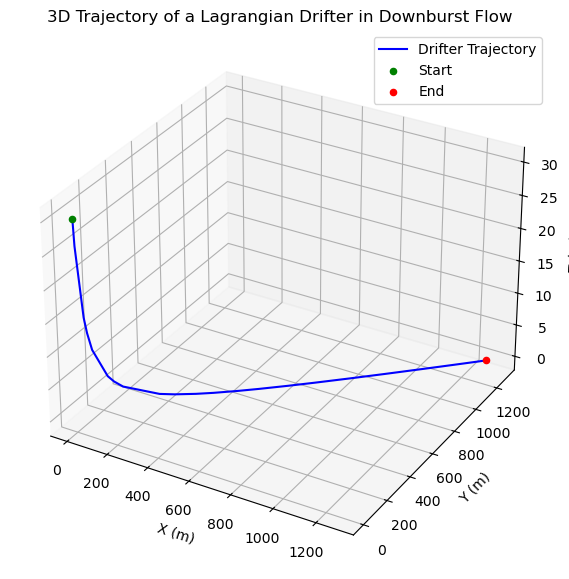

In [84]:
solver = numericalIntegrator(1, 1)
solver.init_ode(velocity_field, drifter_dv)
solver.up_bcs(10, 10, 30)
solver.ode = ode_dynamics

solver.solve_ivp()
solver.show_trajectory()

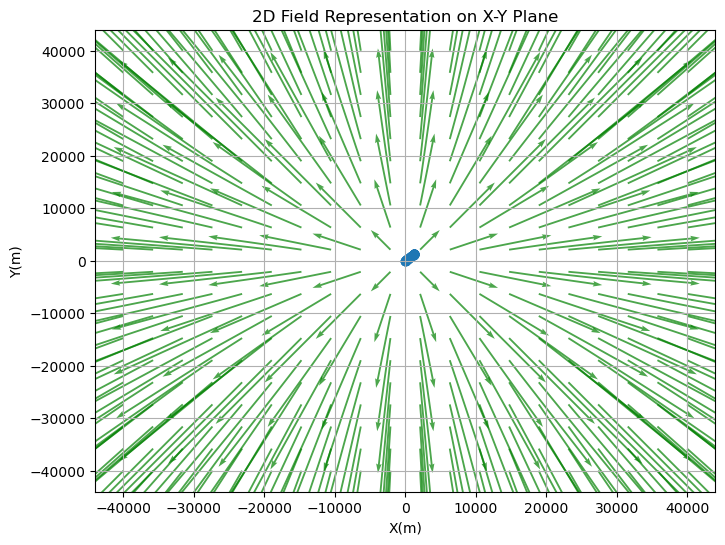

In [85]:
#### import numpy as np
import matplotlib.pyplot as plt

# Define the radial velocity function
def radial_velocity(x, y, z, r_m, R_c, b, z_m, c_1, c_2):
    r = np.sqrt(x**2 + y**2)
    u = np.zeros_like(x)
    v = np.zeros_like(y)

    # Avoid division by zero by checking for r == 0
    mask = r != 0  # mask for non-zero r
    if np.any(mask):
        a = ((r[mask] - r_m) / R_c)
        a = np.sign(a) * (np.abs(a)) ** b
        u_r = (r[mask] / r_m) * np.exp(-a) * (z[mask] / z_m)**(c_2 - 1) * np.exp(c_1 * (z[mask] / z_m)**c_2)
        u[mask] = u_r * (x[mask] / r[mask])
        v[mask] = u_r * (y[mask] / r[mask])

    return u, v

# Define the vertical velocity function
def vertical_velocity(x, y, z, z_m, c_1, c_2, lambda_factor):
    w = lambda_factor * (z / z_m)**(c_2 - 1) * np.exp(c_1 * (z / z_m)**c_2)
    return w

# Define the overall velocity field function for the 2D plot at a specific z
def velocity_field_2d(x, y, z=1):
    r_m = 1.1 * 1000  # m
    z_m = 0.02 * 1000  # m
    R_c = 200  # m
    b = 0.1287
    c_1 = -0.133
    c_2 = 1.1534
    lambda_factor = 1  # Adjust this if needed

    # Ensure z is treated as a scalar
    z = np.full_like(x, z, dtype=np.float64)  # Convert z to array to match x and y if needed

    u, v = radial_velocity(x, y, z, r_m, R_c, b, z_m, c_1, c_2)
    return u, v

# Create a grid of points for the velocity field visualization in the x-y plane
grid_size = np.linspace(-40000, 40000, 20)
X, Y = np.meshgrid(grid_size, grid_size)

# Calculate velocity components on the grid (at z = 1)
U, V = velocity_field_2d(X, Y, z=1)

#U = U*100
#V = V*100

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, scale=10, color='green', alpha=0.7)


plt.scatter(solver.solution.y[0], solver.solution.y[1])
# Labels and title
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.title('2D Field Representation on X-Y Plane')
plt.grid(True)
plt.show()

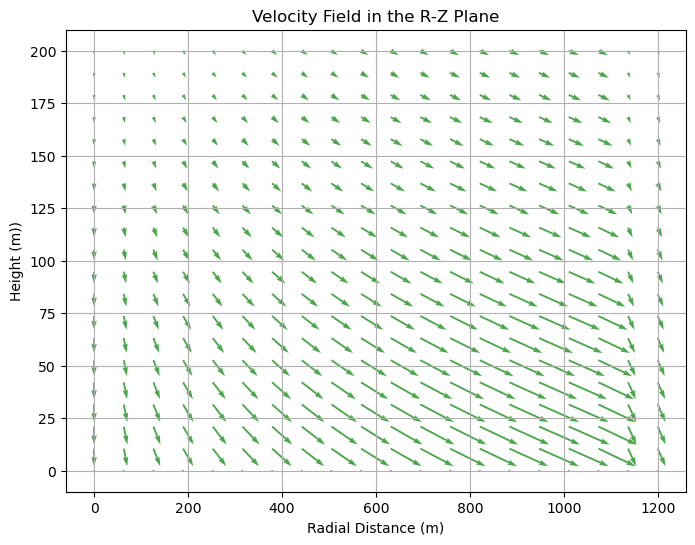

In [68]:
def radial_velocity_rz(r, z, r_m, R_c, b, z_m, c_1, c_2):
    u_r = np.zeros_like(r)

    mask = r != 0  # Avoid zero division for r = 0
    if np.any(mask):
        a = ((r[mask] - r_m) / R_c)
        a = np.sign(a) * (np.abs(a)) ** b
        u_r[mask] = (r[mask] / r_m) * np.exp(-a) * (z[mask] / z_m)**(c_2 - 1) * np.exp(c_1 * (z[mask] / z_m)**c_2)

    return u_r

# Define the vertical velocity function
def vertical_velocity_rz(z, z_m, c_1, c_2, lambda_factor):
    w = -lambda_factor * (z / z_m)**(c_2 - 1) * np.exp(c_1 * (z / z_m)**c_2)
    return w

# Define the overall velocity field function for the r-z plot
def velocity_field_rz(r, z):
    r_m = 1.1 * 1000  # m
    z_m = 0.02 * 1000  # m
    R_c = 200  # m
    b = 0.1287
    c_1 = -0.133
    c_2 = 1.1534
    lambda_factor = 1  # Adjust this if needed

    u_r = radial_velocity_rz(r, z, r_m, R_c, b, z_m, c_1, c_2)
    w = vertical_velocity_rz(z, z_m, c_1, c_2, lambda_factor)
    return u_r, w

# Create a grid of points for the velocity field visualization in the r-z plane
r = np.linspace(0, 1200, 20)  # Radial distance in meters
z = np.linspace(0, 200, 20)  # Height in meters
R, Z = np.meshgrid(r, z)

# Calculate velocity components on the grid
U_r, W = velocity_field_rz(R, Z)

U_r = U_r*10
W = W*10

# Plot the 2D quiver plot for the velocity field in the r-z plane
plt.figure(figsize=(8, 6))
plt.quiver(R, Z, U_r, W, scale=300, color='green', alpha=0.7)
#plt.scatter(solver.solution.y[0], solver.solution.y[2])

# Labels and title
plt.xlabel('Radial Distance (m)')
plt.ylabel('Height (m))')
plt.title('Velocity Field in the R-Z Plane')
plt.grid(True)
plt.show()
